<a href="https://colab.research.google.com/github/duybluemind1988/Data-science/blob/master/IGI_material_control__plotly_web_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#!pip install altair_viewer #Need to install this package

In [4]:
#!pip install jupyter altair vega #No need to install this package

In [5]:
# VERY IMPORTANT INFORMATION
print('Please input number of feature')
feature_num=5
print('Please input number of sample inspection')
sample_num=5
print('Please input position of sample value')
namefile='MMD2019'


Please input number of feature
Please input number of sample inspection
Please input position of sample value


In [72]:
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import pandas as pd
import re
import altair as alt

In [7]:
#alt.renderers.enable('notebook')
#alt.renderers.enable('mimetype')

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import os
os.getcwd()

'/content'

In [10]:
path='/content/drive/My Drive/Data/IGI material Membrane 2019/'
#path='/content/drive/My Drive/Data science/Sonion project/IGI material Armature/'
#path1='/content/drive/My Drive/Data/MMD 2019/'
#path2='/content/drive/My Drive/Data/MMD 2018/'

### read all excel file and sort  by day

In [11]:
import glob
#print(path)
all_files=glob.glob(path + '*.xlsx')
#sort file in directory by reverse:
all_files = sorted(all_files, reverse = False)
print('number of files: ',len(all_files))

number of files:  29


### Initial number of feature and sample:

### add all dataframe to list of dataframe:

In [12]:
finaldf=pd.DataFrame()
for filename in all_files:
    df = pd.read_excel(filename, index_col = None, header = 0)
    #Create data frame feature values(newdf)
    newdf=pd.DataFrame()
    for i in range(feature_num+1)[1:]:
      df_feature= df['Unnamed: '+str(i)][19:(19+sample_num)] #must be = 19 + sample_num /24 la mac dinh
      df_feature=df_feature.reset_index(drop=True)
      newdf=pd.concat([newdf,df_feature],axis=1)
    #print(newdf)  

    #Date transform:
    a=df[['Unnamed: 7']][3:4] #object type - normal is [2:3]
    if a.isna().values:
      a=df[['Unnamed: 7']][2:3]
      date = a.values[0][0] #timestamp type
    else:
      date = a.values[0][0] #timestamp type
    if isinstance(date, str):
      continue
    #Create series date column (row = number of value to record, default = 5)
    date=pd.Series(date)
    datedf=pd.DataFrame()
    for i in range(sample_num):
      datedf=pd.concat([datedf,date],axis=0)

    datedf.reset_index(drop=True, inplace=True)
    newdf.reset_index(drop=True, inplace=True)
    df_combine=pd.concat([datedf,newdf],axis=1) # combine date and features

    #combine all df each filename:
    
    finaldf=pd.concat([finaldf,df_combine],axis=0)
print(finaldf.isnull().sum())
finaldf.reset_index(drop=True,inplace=True)
finaldf.sort_values(by=finaldf.columns[0])
finaldf

0             0
Unnamed: 1    0
Unnamed: 2    0
Unnamed: 3    0
Unnamed: 4    0
Unnamed: 5    0
dtype: int64


,0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,2019-01-11,10.003,1.219,3.197,11.855,0.31
1,2019-01-11,10.005,1.219,3.19,11.855,0.31
2,2019-01-11,10.005,1.219,3.194,11.852,0.31
3,2019-01-11,10.002,1.218,3.198,11.855,0.311
4,2019-01-11,10.003,1.219,3.19,11.85,0.31
...,...,...,...,...,...,...
140,2019-12-31,9.991,1.218,3.199,11.85,0.313
141,2019-12-31,9.999,1.218,3.204,11.849,0.314
142,2019-12-31,10.003,1.219,3.202,11.847,0.313
143,2019-12-31,10.002,1.219,3.201,11.847,0.312


In [13]:
#finaldf.to_csv('finaldfMMD.csv')

In [14]:
finaldf.dropna(inplace=True)
finaldf  

,0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,2019-01-11,10.003,1.219,3.197,11.855,0.31
1,2019-01-11,10.005,1.219,3.19,11.855,0.31
2,2019-01-11,10.005,1.219,3.194,11.852,0.31
3,2019-01-11,10.002,1.218,3.198,11.855,0.311
4,2019-01-11,10.003,1.219,3.19,11.85,0.31
...,...,...,...,...,...,...
140,2019-12-31,9.991,1.218,3.199,11.85,0.313
141,2019-12-31,9.999,1.218,3.204,11.849,0.314
142,2019-12-31,10.003,1.219,3.202,11.847,0.313
143,2019-12-31,10.002,1.219,3.201,11.847,0.312


In [15]:
finaldf.reset_index(drop=True,inplace=True)
column_name=[]
column_name.append('Datef')
for i in range(feature_num+1)[1:]:
  #print(df['Unnamed: '+str(i)][7])
  namecolumn_temp=df['Unnamed: '+str(i)][7]
  namecolumn_temp=namecolumn_temp.replace('.','')
  column_name.append(namecolumn_temp)
finaldf.columns=column_name
finaldf.sort_values(by='Datef') #sort dated , not depend on file sorting
for name in finaldf.columns[1:]:
  try:
    finaldf[name]=finaldf[name].astype(float)
  except:
    continue
finaldf[:3] 

,Datef,C-Pitch,J,I,O,Z
0,2019-01-11,10.003,1.219,3.197,11.855,0.31
1,2019-01-11,10.005,1.219,3.190,11.855,0.31
2,2019-01-11,10.005,1.219,3.194,11.852,0.31


In [16]:
finaldf.dtypes

Datef      datetime64[ns]
C-Pitch           float64
J                 float64
I                 float64
O                 float64
Z                 float64
dtype: object

In [18]:
finaldf = finaldf.select_dtypes(exclude=['object'])
finaldf.dtypes

Datef      datetime64[ns]
C-Pitch           float64
J                 float64
I                 float64
O                 float64
Z                 float64
dtype: object

### set up tolerance dict:USL,LSL,Nominal

In [19]:
#set up tolerance dict:USL,LSL,Nominal
#Tolerance set up when not drop object type column, not reflect exactly tolerance vs data analysis
tolerance={}
for column in df.columns[1:(feature_num+1)]:
    namecolumn_temp=df[column][7] #df: dataframe latest in for loop
    namecolumn_temp=namecolumn_temp.replace('.','')
    tolerance[namecolumn_temp] =[df[column][9],df[column][10],df[column][15]]
tolerance

{'C-Pitch': [10.01, 9.99, 10],
 'I': [3.21, 3.1900000000000004, 3.2],
 'J': [1.22, 1.21, 1.21],
 'O': [11.86, 11.84, 11.85],
 'Z': [0.32, 0.27999999999999997, 0.3]}

In [20]:
#Create list of dataframe, combine feature value and USL,LSL, Nominal
DFdict={}
for name in finaldf.columns[1:]:
    print('Chart: ',name)
        
    #Create series USL:
    USL = tolerance[name][0]
    USL=pd.Series(USL)
    s1=pd.DataFrame()
    for i in range(len(finaldf)):
      s1=pd.concat([s1,USL],axis=0)
    s1.rename(columns={0:'USL'},inplace=True)
    
    #Create series LSL:
    LSL = tolerance[name][1]
    LSL=pd.Series(LSL)
    s2=pd.DataFrame()
    for i in range(len(finaldf)):
      s2=pd.concat([s2,LSL],axis=0)
    s2.rename(columns={0:'LSL'},inplace=True)
    
    #Create series nominal:
    nominal = tolerance[name][2]
    nominal=pd.Series(nominal)
    s3=pd.DataFrame()
    for i in range(len(finaldf)):
      s3=pd.concat([s3,nominal],axis=0)
    s3.rename(columns={0:'Nominal'},inplace=True)
    
    #combine Date,feature, LSL,USL,nominal to finaldataframe (for each feature):
    finaldf['Datef'].reset_index(drop=True,inplace=True)
    finaldf[name].reset_index(drop=True,inplace=True)
    s1.reset_index(drop=True,inplace=True)
    s2.reset_index(drop=True,inplace=True)
    s3.reset_index(drop=True,inplace=True)
    df_temp = pd.concat([finaldf['Datef'],finaldf[name],s1,s2,s3],axis=1)  

    #Create dict of dataframe for each feature columns:
    DFdict[name]=df_temp # Include Date, name, USL, LSL, nominal each parameter(J, I, O or Z...)
    #print(DFdict[name][:3])
    

Chart:  C-Pitch
Chart:  J
Chart:  I
Chart:  O
Chart:  Z


In [33]:
print(DFdict.keys())
#df=DFdict['J']
#print(df.columns)
for name in DFdict.keys():
  print(name)
  print(DFdict[name][:3])

dict_keys(['C-Pitch', 'J', 'I', 'O', 'Z'])
C-Pitch
       Datef  C-Pitch    USL   LSL  Nominal
0 2019-01-11   10.003  10.01  9.99     10.0
1 2019-01-11   10.005  10.01  9.99     10.0
2 2019-01-11   10.005  10.01  9.99     10.0
J
       Datef      J   USL   LSL  Nominal
0 2019-01-11  1.219  1.22  1.21     1.21
1 2019-01-11  1.219  1.22  1.21     1.21
2 2019-01-11  1.219  1.22  1.21     1.21
I
       Datef      I   USL   LSL  Nominal
0 2019-01-11  3.197  3.21  3.19      3.2
1 2019-01-11  3.190  3.21  3.19      3.2
2 2019-01-11  3.194  3.21  3.19      3.2
O
       Datef       O    USL    LSL  Nominal
0 2019-01-11  11.855  11.86  11.84    11.85
1 2019-01-11  11.855  11.86  11.84    11.85
2 2019-01-11  11.852  11.86  11.84    11.85
Z
       Datef     Z   USL   LSL  Nominal
0 2019-01-11  0.31  0.32  0.28      0.3
1 2019-01-11  0.31  0.32  0.28      0.3
2 2019-01-11  0.31  0.32  0.28      0.3


In [30]:
DFdict_final={}
for name in DFdict.keys():
  df=DFdict[name].copy()
  df_group=df.groupby('Datef').mean() # mean value by Date
  df_group.reset_index(inplace=True)

  value_name=df_group.columns[1] #'C-Pitch', 'J', 'I', 'O', 'Z'
  df_group[value_name] = df_group[value_name].round(decimals=3)
  #---------------------------------------------------------------#

  # Create a selection that chooses the nearest point & selects based on x-value
  #UCL,LCL,nominal:
  sigma=3
  df_final = df_group.assign(
                UCL=df_group[value_name].mean() + df_group[value_name].std()*sigma,
                LCL=df_group[value_name].mean() - df_group[value_name].std()*sigma,
                mean=df_group[value_name].mean())
  DFdict_final[name]=df_final

In [32]:
print(DFdict_final.keys())
#df=DFdict['J']
#print(df.columns)
for name in DFdict_final.keys():
  print(name)
  print(DFdict_final[name][:3])

dict_keys(['C-Pitch', 'J', 'I', 'O', 'Z'])
C-Pitch
       Datef  C-Pitch    USL   LSL  Nominal        UCL       LCL       mean
0 2019-01-11   10.004  10.01  9.99     10.0  10.006001  9.997142  10.001571
1 2019-01-22   10.001  10.01  9.99     10.0  10.006001  9.997142  10.001571
2 2019-01-26   10.002  10.01  9.99     10.0  10.006001  9.997142  10.001571
J
       Datef      J   USL   LSL  Nominal       UCL       LCL      mean
0 2019-01-11  1.219  1.22  1.21     1.21  1.222084  1.216344  1.219214
1 2019-01-22  1.219  1.22  1.21     1.21  1.222084  1.216344  1.219214
2 2019-01-26  1.220  1.22  1.21     1.21  1.222084  1.216344  1.219214
I
       Datef      I   USL   LSL  Nominal       UCL       LCL      mean
0 2019-01-11  3.194  3.21  3.19      3.2  3.206102  3.191327  3.198714
1 2019-01-22  3.199  3.21  3.19      3.2  3.206102  3.191327  3.198714
2 2019-01-26  3.200  3.21  3.19      3.2  3.206102  3.191327  3.198714
O
       Datef       O    USL    LSL  Nominal        UCL        LCL      

### Line chart plotly

In [49]:
for name in DFdict_final.keys(): #also group
  df=DFdict_final[name].copy()
  df=df.sort_values(by=['Datef'])
  for a in df.columns[1:]:
    df[a] = df[a].round(decimals=3)

  #df_a=df.groupby('Datef').mean()
  #df_a.reset_index(inplace=True)

  #for a in df.columns[1:]:
  #  df_a[a] = df_a[a].round(decimals=3)

  #Layout
  fig = make_subplots(
      rows=1, cols=2,
      shared_xaxes=True,
      vertical_spacing=0.03,
      column_widths=[0.8, 0.2],
      subplot_titles=("Line plot "+name, "Histogram")
  )

  #Control chart 1 
  fig.add_trace(go.Scatter(
                          x=df['Datef'], y=df[name],
                          mode='lines+markers',
                          name='mean'
                          ),row=1, col=1
                )
  #USL, LSL
  fig.add_trace(go.Scatter(x=df['Datef'], y=df['USL'],name='USL', line=dict( color='#FF5733')),row=1, col=1)
  fig.add_trace(go.Scatter(x=df['Datef'], y=df['LSL'],name='LSL',line=dict( color='#FF5733')),row=1, col=1)
  fig.add_trace(go.Scatter(x=df['Datef'], y=df['Nominal'],name='Nominal',line=dict( color='#FF5733')),row=1, col=1)
  # UCL, LCL
  fig.add_trace(go.Scatter(x=df['Datef'], y=df['UCL'],name='UCL', line=dict( color='#33C2FF')),row=1, col=1)
  fig.add_trace(go.Scatter(x=df['Datef'], y=df['LCL'],name='LCL', line=dict( color='#33C2FF')),row=1, col=1)
  fig.add_trace(go.Scatter(x=df['Datef'], y=df['mean'],name='mean', line=dict( color='#33C2FF')),row=1, col=1)

  #Histogram 1
  fig.add_trace(go.Histogram(
      y=df[name],
      #histnorm='percent',
      name='Histogram', # name used in legend and hover labels,
      marker_color='#EB89B5',
      opacity=0.75,
                ),row=1, col=2
  )

  #Final layout:
  fig.update_layout(height=400, width=1700)

  fig.show()

### Box chart altair

In [51]:
import json
import datetime 

#Function convert datetime to json
def defaulta(obj):
      if isinstance(obj, (datetime.date, datetime.datetime)):
          return obj.isoformat()

In [59]:

#Set up width and hist for all chart
width_main=800
height_main=150
width_hist=100

list_chart1=[]
for name in DFdict.keys():
  df_box=DFdict[name].copy() #All values for each features
  df_box['Datef']=df_box['Datef'].dt.date
  value_name2=df_box.columns[1] #'C-Pitch', 'J', 'I', 'O', 'Z'
  #Convert datetime to json
  df_box['Datef']=df_box['Datef'].apply(lambda x: json.dumps(x, default = defaulta) )
  base1 = alt.Chart(df_box).properties(width=width_main,height=height_main)

  #Create box plot, USL, LSL, Nominal
  box=base1.mark_boxplot().encode(
      x=alt.X(
          'Datef:O',scale=alt.Scale(),title="",
          ),
      y=alt.Y(value_name2+':Q',scale=alt.Scale(zero=False),title="")
  ).properties(width=width_main,height=height_main)

  line_USL=base1.mark_line(color='red').encode(
      x=alt.X('Datef:O',scale=alt.Scale(zero=False)),
      y=alt.Y('USL:Q',scale=alt.Scale(zero=False)),
  )

  line_LSL=base1.mark_line(color='red').encode(
      x=alt.X('Datef:O',scale=alt.Scale(zero=False)),
      y=alt.Y('LSL:Q',scale=alt.Scale(zero=False)),
  )

  line_Nominal=base1.mark_line(color='red').encode(
      x=alt.X('Datef:O',scale=alt.Scale(zero=False)),
      y=alt.Y('Nominal:Q',scale=alt.Scale(zero=False)),
  )

  chart=box + line_USL + line_LSL + line_Nominal

  #Sub chart create (Histogram, USL, LSL, Nominal)
  record_bar= alt.Chart(df_box).mark_bar().encode(
      x='count()',
      y=alt.Y(value_name2, bin=True,title="")
  ).properties(
      height=height_main,
      width=width_hist
  )

  USL_rule = alt.Chart(df_box).mark_rule(color='red').encode(
      y=alt.Y('USL'),
      size=alt.value(1)
  )
  LSL_rule = alt.Chart(df_box).mark_rule(color='red').encode(
      y=alt.Y('LSL'),
      size=alt.value(1)
  )
  Nominal_rule = alt.Chart(df_box).mark_rule(color='red').encode(
      y=alt.Y('Nominal'),
      size=alt.value(1)
  )

  sub_chart=record_bar + USL_rule + LSL_rule + Nominal_rule
  boxchart= 'chart' + name
  boxchart=alt.hconcat(chart,sub_chart).properties(title='Box Plot ' + value_name2)
  list_chart1.append(boxchart)
  boxchart
  #altair_viewer.display(boxchart, inline=True)
#boxchart_combine.save('boxchart_combine.html')


In [60]:
box_chart_combine=alt.vconcat(data=df_group)
for chart in list_chart1:
  box_chart_combine &= chart
#box_chart_combine.save('box_chart_combine'+namefile+'.html')
box_chart_combine

alt.VConcatChart(...)

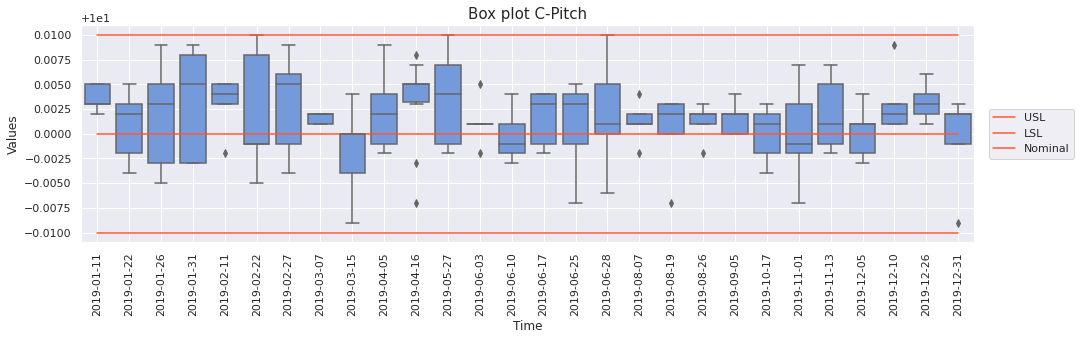

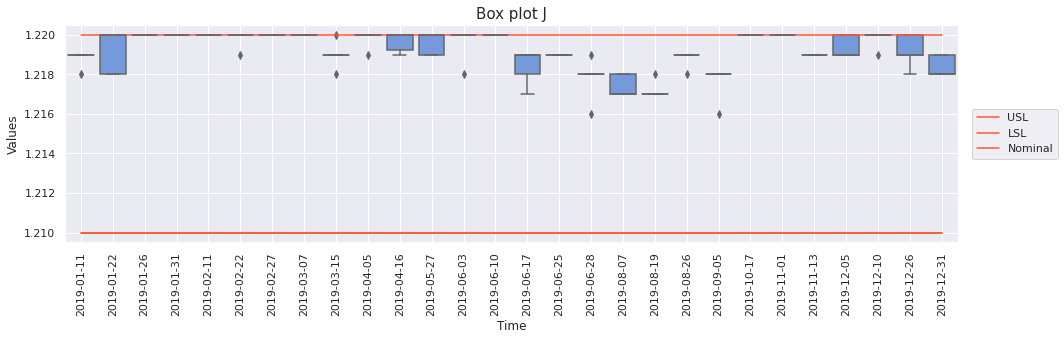

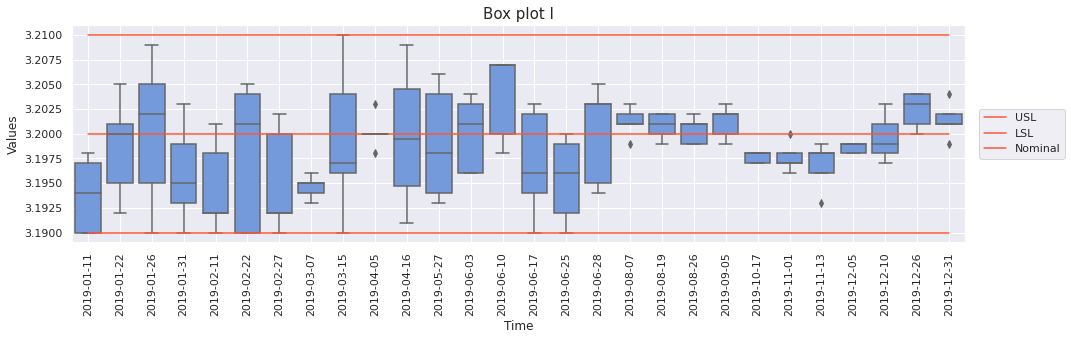

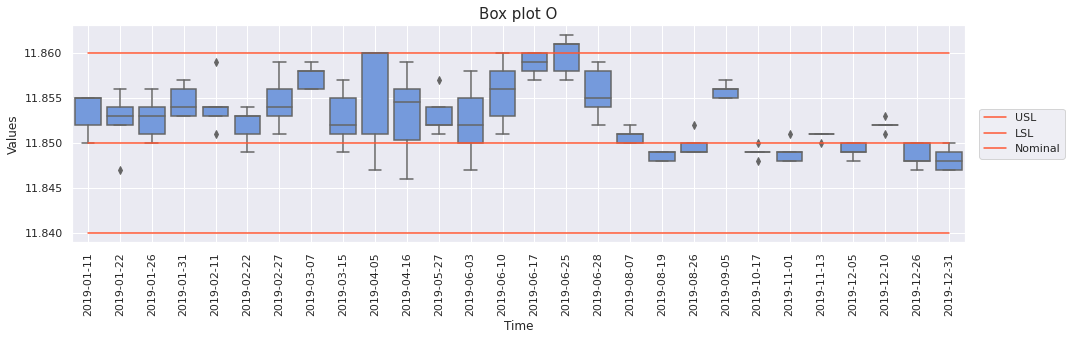

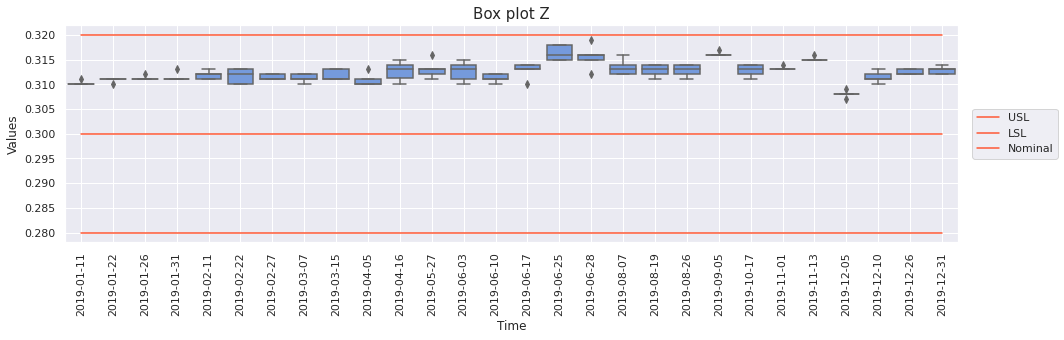

In [73]:
for name in DFdict.keys():
  df_box=DFdict[name].copy() #All values for each features
  df_box['Datef']=df_box['Datef'].dt.date
  df_box_line=df_box.groupby('Datef').mean()#Group values for line chart
  df_box_line.reset_index(inplace=True)

  fig,ax=plt.subplots(figsize=(16,4))
  sns.boxplot(x='Datef',y=name,data=df_box,ax=ax,color='cornflowerblue') 
  #df_box.boxplot(column='C-Pitch',by='Datef',ax=ax)#df_box: data with no group by date
  df_box_line.plot(y='USL',kind='line',ax=ax,color='#FF5733') #df_box_line: data with group by date
  df_box_line.plot(y='LSL',kind='line',ax=ax,color='#FF5733')
  df_box_line.plot(y='Nominal',kind='line',ax=ax,color='#FF5733')

  #plt.gca().set_xticks(df_box_line['Datef'])
  plt.gca().set_xticklabels(df_box_line['Datef'],rotation=90)
  plt.gca().set_title('Box plot '+name,fontsize=15)
  plt.gca().legend(loc ='center left',bbox_to_anchor=(1.01, 0.5))

  plt.xlabel('Time')
  plt.ylabel('Values')